# Machine Learning Project

Format: 2 (Usage of different algorithms for prediction goal)

Dataset: [Adult from UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/adult)

Goal:   
1. Predict whether a person makes over 50K a year (classification problem).
2. Predict the age of a person (regression problem).

### Table of Contents

* [1. Classification problem](#classification)
    * [1.1. Preprocessing](#Preprocessing)
        * [1.1.1. Loading of data](#Loading)
        * [1.1.2. Visual checking of the data](#checking)
        * [1.1.3. Description and histograms for numerical data](#histogramm)
        * [1.1.4. Encoding of Categorical Data](#Categorical_Data)
        * [1.1.5. Feature selection](#Feature_selection)
        * [1.1.6. Splitting in training and test data](#Splitting)
        * [1.1.7. Feature scaling](#Feature_scaling)

    * [1.2. Prediction Algorithms](#Prediction_Algorithms)
        * [1.2.1. Evaluation of the models](#evaluation)
        * [1.2.2. K-Nearest Neighbours](#knn)
        * [1.2.3. Decision Tree](#Decision_Tree)
        * [1.2.4. Support Vector Machines](#SVM)
        * [1.2.5. Logistic Regression](#Logistic_Regression)
        * [1.2.6. Naive Bayes](#Naive_Bayes)

    * [1.3. Conclusion](#model_summary)
      
* [2. Regression problem](#regression)
    * [2.1. Preprocessing](#preprocessing_reg)
        * [2.1.1. Feature selection](#feature_selection_reg)
        * [2.1.2. Checking for Linearity](#linearity_check)
        * [2.1.3. Splitting in training and test data](#splitting_2)
        * [2.1.4. Feature scaling](#Feature_scaling_2)
    * [2.2. Prediction Algorithms](#Prediction_Algorithms_2)
        * [2.2.1. Multiple Linear Regression](#mul_lin_reg)
        * [2.2.2. Ridge Regression](#ridge_reg)
        * [2.2.3. K-Nearest Neighbours](#knn_reg)
        * [2.2.4. Decision Tree](#Decision_Tree_2)
    * [2.3. Conclusion](#model_summary_reg)

# 1. Classification problem <a class="anchor" id="classification"></a>
## 1.1. Preprocessing <a class="anchor" id="Preprocessing"></a>
### 1.1.1. Loading of data <a class="anchor" id="Loading"></a>

The data will be read from .csv files to a pandas DataFrame. 
The given splitting into training and test data is revoked, so different kinds of splitting techniques can be evaluated later. The column headers are added manually.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_titles = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
"relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

train = pd.read_csv('Adult_Data.csv')
train.columns = column_titles

test = pd.read_csv('Adult_Test.csv')
test.columns = column_titles

data = pd.concat([train, test], ignore_index=True)

print("Number of columns: " + str(data.shape[1]) + "\nNumber of rows: " + str(data.shape[0]))

data.head()

Number of columns: 15
Number of rows: 48840


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The dataset contains data about the US's people and economy extracted from the 1994 Census database. It has 48.840
instances and 15 attributes (continuous and categorical) including age, workclass, fnlwgt (final weight), education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week and native-country.  
With these features, we will try to predict the last column 'class' as a classification problem.

### 1.1.2. Visual checking of the data <a class="anchor" id="checking"></a>
Checking of all unique values of all the attributes:

In [2]:
for column in data:
    sorted_unique_vals = list(data[column].unique())
    sorted_unique_vals.sort()
    print("\nUnique values in column: " + column + " (n = " + str(len(sorted_unique_vals)) + ")")
    if len(sorted_unique_vals) > 6:
        print("[" + str(sorted_unique_vals[0]) + ", " + str(sorted_unique_vals[1]) + ", " + str(sorted_unique_vals[2]) + ", ... , "
              + str(sorted_unique_vals[-3]) + ", " + str(sorted_unique_vals[-2]) + ", " + str(sorted_unique_vals[-1]) + "]")
    else:
        print(sorted_unique_vals)


Unique values in column: age (n = 74)
[17, 18, 19, ... , 88, 89, 90]

Unique values in column: workclass (n = 9)
[ ?,  Federal-gov,  Local-gov, ... ,  Self-emp-not-inc,  State-gov,  Without-pay]

Unique values in column: fnlwgt (n = 28521)
[12285, 13492, 13769, ... , 1455435, 1484705, 1490400]

Unique values in column: education (n = 16)
[ 10th,  11th,  12th, ... ,  Preschool,  Prof-school,  Some-college]

Unique values in column: education-num (n = 16)
[1, 2, 3, ... , 14, 15, 16]

Unique values in column: marital-status (n = 7)
[ Divorced,  Married-AF-spouse,  Married-civ-spouse, ... ,  Never-married,  Separated,  Widowed]

Unique values in column: occupation (n = 15)
[ ?,  Adm-clerical,  Armed-Forces, ... ,  Sales,  Tech-support,  Transport-moving]

Unique values in column: relationship (n = 6)
[' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife']

Unique values in column: race (n = 5)
[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other'

* some attributes have missing values marked with ' ?'  (workclass, occupation, native-country)
* education-num is the numerical representation for the education
* all strings include a blank at the beginning
* the class attribute (target) is formatted in two different ways for the same values
* since the data is about US citizens, explore the distribution of the attribute 'native-country' further

#### Missing values <a class="anchor" id="Missing_values"></a>
Rows with missing values will be dropped, since the number of rows with missing values is small compared to the size of the dataset:

In [3]:
data = data.replace(' ?', None).dropna()

print("Number of columns: " + str(data.shape[1]) + "\nNumber of rows: " + str(data.shape[0]))

Number of columns: 15
Number of rows: 45220


#### Education <a class="anchor" id="Education"></a>
The education column can be dropped, since we only need the numerical column education-num for the prediction later.

In [4]:
data = data.drop(columns=['education'])

#### Blanks in strings <a class="anchor" id="Blanks"></a>
Removing of blanks in the beginning or end of strings:

In [5]:
data_obj = data.select_dtypes(['object'])
data[data_obj.columns] = data_obj.apply(lambda x: x.str.strip())

#### Target variable <a class="anchor" id="Target"></a>
Unify target variables values and show histogram:

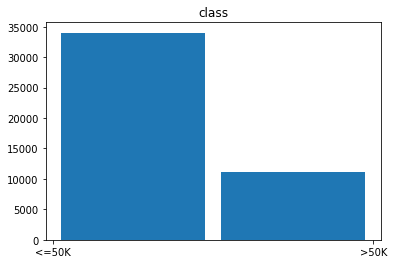

<=50K: 0.7521450685537373
>50K: 0.24785493144626272


In [6]:
data['class'] = data['class'].replace(['<=50K.','>50K.'],['<=50K','>50K'])

n, bins, patches  = plt.hist(data['class'], bins = 2, rwidth = 0.9)
plt.title('class')


plt.show()

print("<=50K: " + str(n[0] / (n[0] + n[1])))
print(">50K: " + str(n[1] / (n[0] + n[1])))

Around 75% of the data has one value of the target variable and around 25% has the second value of the target variable, so it's unbalanced. This can disturb the evaluation of applied models to this dataset. The problem will be addressed later.

#### Attribute: native-country <a class="anchor" id="native-country"></a>
Explore the distribution of the unique values for the attribute 'native-country':

In [7]:
data['native-country'].value_counts().head()

United-States    41290
Mexico             903
Philippines        283
Germany            193
Puerto-Rico        175
Name: native-country, dtype: int64

Since most of the values for the native country is 'United-States', the rest can be grouped to 'Other'. This will reduce the number of different unique values for the categorical attribute and will simplify all coming steps.

In [8]:
data.loc[data['native-country'] != 'United-States', 'native-country'] = 'Other'

### 1.1.3. Description and histograms for numerical data <a class="anchor" id="histogramm"></a>

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.select_dtypes(include=numerics)
data_num.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45220.000000,4.522000e+04,45220.000000,45220.000000,45220.000000,45220.000000
mean,38.548231,1.897364e+05,10.118465,1101.430982,88.599337,40.938058
std,13.218009,1.056401e+05,2.552860,7506.592602,404.964619,12.007772
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173908e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379318e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


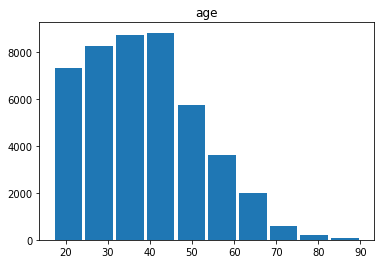

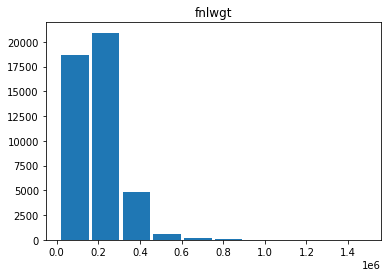

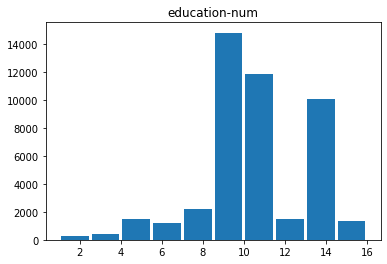

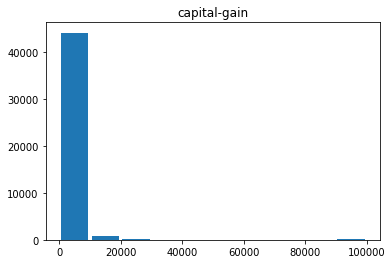

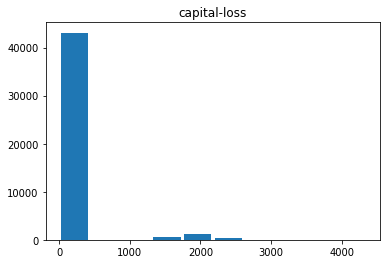

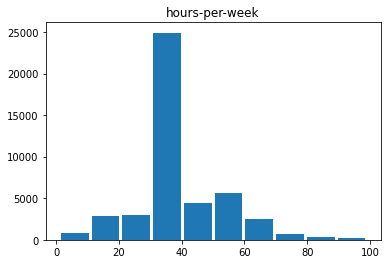

In [10]:
for column in data_num:
    plt.hist(data_num[column], rwidth = 0.9)
    plt.title(column)
    plt.show()

The range of the values of the numerical features is very different, so scaling of the data will be necessary later.

### 1.1.4. Encoding of Categorical Data <a class="anchor" id="Categorical_Data"></a>
For the Machine Learning algorithms, the categorical data in string format needs to be changed to numerical data type. Since the data is nominal, the data will be transformed using the One Hot Encoding to avoid adding bias to the data by transforming it to ordinal data using simple labeling numbers. For this, we use the Pandas function [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [11]:
one_hot_encoded_data = pd.get_dummies(data, columns = data_obj.columns)
one_hot_encoded_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,class_<=50K,class_>50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,1,0,1,0,1,1,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0


Drop second column of binary target variable (class):

In [12]:
data = one_hot_encoded_data.drop(columns=['class_>50K'])

-> 1 in column 'class_<=50K' stands for '<=50K', 0 for '>50K'

### 1.1.5. Feature selection <a class="anchor" id="Feature_selection"></a>
For the feature selection, we have a look at a correlation matrix of the numerical attributes with a heatmap:

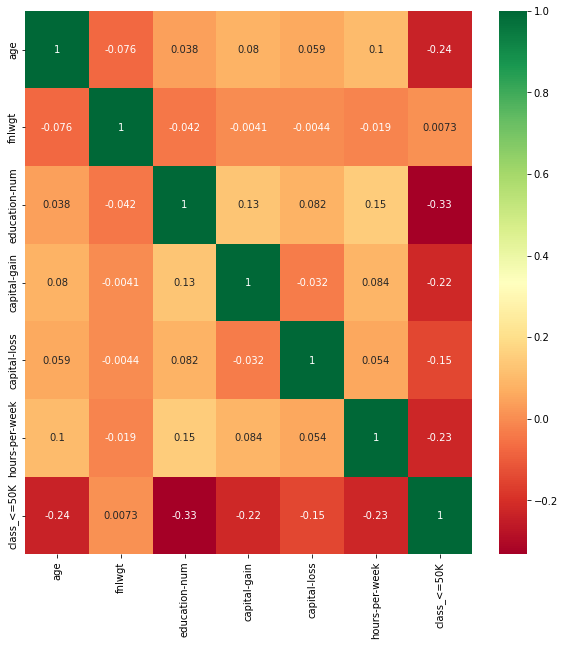

In [13]:
import seaborn as sns

# get correlation of features in the dataset
corrmat = data[list(data_num.columns) + ['class_<=50K']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The correlation value of the variable 'fnlwgt' and the target variable 'class_<=50K' is close to 0, so the variables are not correlated. We drop the feature 'fnlwgt'. For the rest of the variables the correlations in between them is very low and the correlations to the target variable is quite similar for all of them, so we leave all features for the models.

In [14]:
data = data.drop(columns=['fnlwgt'])
data

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,class_<=50K
0,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
1,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
2,53,7,0,0,40,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1
3,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4,37,14,0,0,40,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
48835,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1
48837,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
48838,44,13,5455,0,40,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1


### 1.1.6. Splitting in training and test data <a class="anchor" id="Splitting"></a>
Before any scaling is taking place, the data needs to be divided into training and test data, so the test data is not influenced by the training data. A test size of 20% is chosen. To make the test runs reproducible, a fixed random state is set for now. 

Also, the imbalanced number of rows per target value needs to get balanced. To get a balanced number of target values, new rows will be created using the function [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Smote creates new rows based on the existing ones, but doesn't just copy a part of the existing dataset. The function will be applied to the training set, since the test set shouldn't be touched at any point.

In [15]:
from sklearn.model_selection import train_test_split

# save this state of the dataset for later regression prediction
data_reg = data.copy()

# input variables
X = data.iloc[:, :-1]
# target variable
y = data.iloc[:, -1]

# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=888)

X_train, y_train = smote.fit_resample(X_train, y_train)

### 1.1.7. Feature scaling <a class="anchor" id="Feature_scaling"></a>

The numerical data has different scaling for the single features. To equal their influence in the prediction, a normalization scale is applied to these features.  
The One Hot Encoded columns are already in the range of 0 and 1, so they won't be touched by the scaling.
For this task, we use the sklearn [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [16]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data using the training data scaler
X_train_norm = X_train.copy()
X_train_norm[X_train_norm.columns] = norm.transform(X_train[X_train.columns])

# transform testing data using the training data scaler
X_test_norm = X_test.copy()
X_test_norm[X_test_norm.columns] = norm.transform(X_test[X_test.columns])

## 1.2. Prediction Algorithms <a class="anchor" id="Prediction_Algorithms"></a>

### 1.2.1. Evaluation of the models <a class="anchor" id="evaluation"></a>

For the evaluation of the performance of the classifiers there are different methods that can be used, such as accuracy, precision, recall, f1-score, ROC Curve, Precision-Recall Curve, ...  
Except for accuracy, all methods focus on the target variable being 1 - they are putting different weights of importance to the target variable being 0 or 1. Since our prediction goal to see whether a person makes more than 50K a year doesn't include which outcome is more preferred, we will stick to only the accuracy for evaluating our models.

Set up of a general function for plotting a confusion matrix for the model evaluation:

In [17]:
# import libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# define function for plotting a confusion matrix
def plot_confusion_matrix(cf_matrix, model_name):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title(f'Confusion Matrix for {model_name}\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    plt.show()

### 1.2.2. K-Nearest Neighbours <a class="anchor" id="knn"></a>

K-Nearest Neighbours is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
KNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.  
We use the sklearn implementation of [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

The challenge here is to find the best K.

First run with K = 5 (default):

Model accuracy score with default setting: 0.8066


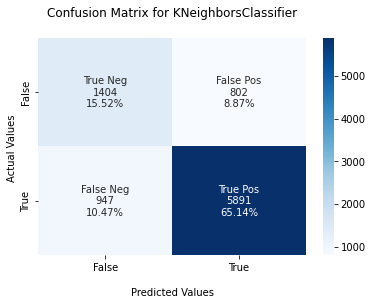

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

# apply model to training data
model_knn.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_knn.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with default setting: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

plot_confusion_matrix(cf_matrix, 'KNeighborsClassifier') 

The accuracy is already quite high. Since around 75% of the class entries of the test dataset have the value '<=50K' == 1 it fits that the biggest field in the confusion matrix is the 'True Pos'.

To find the best K value, the algorithm is run over a range of possible Ks and the K value with the best resulting accuracy of the prediction is selected:

In [19]:
scores_knn = []
k_range = list(range(1, 21))

for i in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_norm, y_train)
    pred_i = model_knn.predict(X_test_norm)
    scores_knn.append(accuracy_score(y_test, pred_i))

Best K value: 11


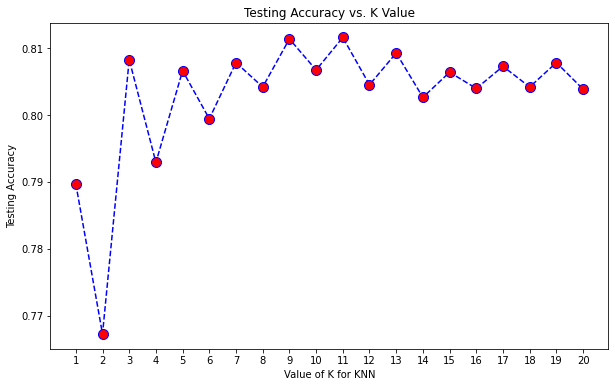

In [20]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(10,6))
plt.plot(k_range, scores_knn, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. K Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_range)

best_k_value = scores_knn.index(max(scores_knn)) + 1
print(f'Best K value: {best_k_value}')

It is obvious, that an even number for K leads to a worse performance. This is because the algorithm is a majority voting algorithm. An even number can lead to a tie in number of samples at the decision boundaries.  

After K = 11 the accuracy is not getting much better anymore, so K = 11 is chosen for the knn classifier.

In [21]:
model_knn = KNeighborsClassifier(n_neighbors = best_k_value)

# apply model to training data
model_knn.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_knn.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8116


### 1.2.3. Decision Tree <a class="anchor" id="Decision_Tree"></a>

Decision Tree is a Supervised learning technique. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

For the decision trees, no feature scaling is needed, because the comparison of values stays inside the single features. The original train and test data will be used.  
For splitting the nodes of the decision tree, the gini and entropy criterion can be used. Both will be evaluated.  
To handle overfitting, a parameter for the maximum depth of the tree needs to be found.  
We use the sklearn implementation of [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [22]:
from sklearn.tree import DecisionTreeClassifier

# to get the same results for every new run, the random_state is set
model_tree = DecisionTreeClassifier(random_state = 0) # default criterion = 'gini'

# apply model to training data
model_tree.fit(X_train, y_train)

# predict target for the test data with trained model
y_pred = model_tree.predict(X_test)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8010


In a next step, the other criterion "entropy" will be tested:

In [23]:
# to get the same results for every new run, the random_state is set
model_tree = DecisionTreeClassifier(random_state = 0, criterion = "entropy")

# apply model to training data
model_tree.fit(X_train, y_train)

# predict target for the test data with trained model
y_pred = model_tree.predict(X_test)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with max_depth = None: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with max_depth = None: 0.8094


Since the accuracy for criterion "entropy" was a little better than "gini", the criterion = "entropy" will be used.

Now, the max_depth needs to be optimized:

In [24]:
# get the maximum depth of the tree
max_depth = model_tree.tree_.max_depth
print(f'Maximum depth of the tree: {max_depth}')

scores_tree = []
d_range = list(range(1, max_depth + 1))

for i in d_range:
    model_tree = DecisionTreeClassifier(random_state = 0, max_depth=i, criterion = "entropy")
    model_tree.fit(X_train, y_train)
    pred_i = model_tree.predict(X_test)
    scores_tree.append(accuracy_score(y_test, pred_i))

Maximum depth of the tree: 48


Best max_depth: 18


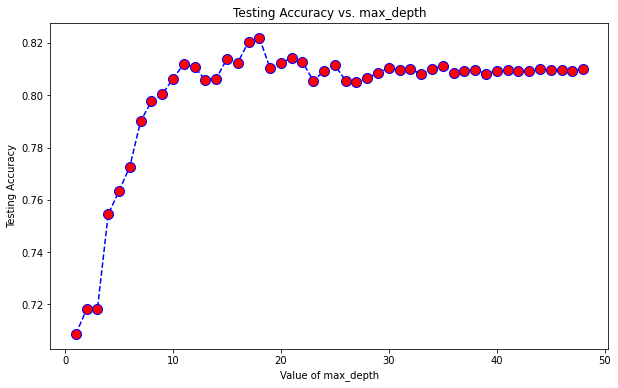

In [25]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(d_range, scores_tree, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. max_depth')
plt.xlabel('Value of max_depth')
plt.ylabel('Testing Accuracy')

best_max_depth = scores_tree.index(max(scores_tree)) + 1
print(f'Best max_depth: {best_max_depth}')

In [26]:
# to get the same results for every new run the random_state is set
model_tree = DecisionTreeClassifier(random_state = 0, max_depth = best_max_depth, criterion = "entropy")

# apply model to training data
model_tree.fit(X_train, y_train)

# predict target for the test data with trained model
y_pred = model_tree.predict(X_test)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with max_depth = ' + str(best_max_depth) + ': {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with max_depth = 18: 0.8221


The accuracy for the DecisionTreeClassifier with criterion = "entropy" and max_depth = 18 is 82,21%.

### 1.2.4. Support Vector Machines <a class="anchor" id="SVM"></a>

A Support Vector Machine (SVM) is also a supervised machine learning model that tries to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.  
We use the sklearn implementation of [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

For the SVM different kernel functions can be used to compute the hyperplane like "linear", "polynomial", and "radial basis function (RBF)":

In [27]:
from sklearn.svm import SVC
from datetime import datetime
start_time = datetime.now()

model_svm = SVC(kernel = 'linear')

# apply model to training data
model_svm.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_svm.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with kernel = "linear" : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model accuracy score with kernel = "linear" : 0.8293
Duration: 0:01:10.211735


In [28]:
start_time = datetime.now()

model_svm = SVC(kernel='poly')

# apply model to training data
model_svm.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_svm.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with kernel = "poly" : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model accuracy score with kernel = "poly" : 0.8274
Duration: 0:01:16.286731


In [29]:
start_time = datetime.now()

model_svm = SVC(kernel='rbf')

# apply model to training data
model_svm.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_svm.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with kernel = "rbf" : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model accuracy score with kernel = "rbf" : 0.8223
Duration: 0:01:29.005492


All kernels result in quite similar accuracy results. They all need a long time to compute.

The LinearSVC implementation is supposed to run faster and give the same results as the SVC with kernel = "linear":

In [30]:
from sklearn.svm import LinearSVC
start_time = datetime.now()

model_svm = LinearSVC()

# apply model to training data
model_svm.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_svm.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model accuracy score: 0.8357
Duration: 0:00:00.673107


The LinearSVC runs much faster and gives the same results.

The best value for the regularization parameter C needs to be found:

In [31]:
scores_svm = []
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]

for i in c_range:
    model_svm = LinearSVC(C = i, max_iter = 100000)
    model_svm.fit(X_train_norm, y_train)
    pred_i = model_svm.predict(X_test_norm)
    scores_svm.append(accuracy_score(y_test, pred_i))

Best C: 10


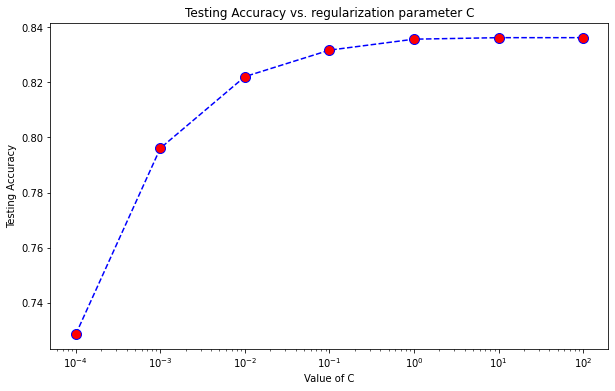

In [32]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(10,6))
plt.plot(c_range, scores_svm, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. regularization parameter C')
plt.xlabel('Value of C')
plt.ylabel('Testing Accuracy')
plt.xscale('log', base=10) 

best_c = c_range[scores_svm.index(max(scores_svm))]
print(f'Best C: {best_c}')

With C = 10 the model works best.

In [33]:
model_svm = LinearSVC(C = best_c, max_iter = 10000)

# apply model to training data
model_svm.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_svm.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8362


### 1.2.5. Logistic Regression <a class="anchor" id="Logistic_Regression"></a>

Logistic Regression is a predictive analysis algorithm and based on the concept of probability using the Sigmoid Function as a cost function.

Fulfilled requirements for Logistic Regression:
* the dependent variable is binary
* the independent variables are independent of each other (see correlation matrix)
* the dataset is big enough

We use the sklearn implementation of [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression).

Logistic Regression with default parameters:

In [34]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter = 500)

# apply model to training data
model_lr.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_lr.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with default setting: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default setting: 0.8343


 To find the best parameters, the sklearn GridSearchCV will be used. It runs through all the different parameters that are fed into the parameter grid using cross validation and produces the best combination of parameters. You can choose here between different regularization (Lasso and Ridge), C for the regularization strength and different solver functions.

In [35]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid={"C" : [0.001, 0.01, 0.1, 1, 10, 100], "penalty" : ["l1", "l2"], "solver" : ['lbfgs', 'liblinear', 'saga']}

model_lr = LogisticRegression(max_iter = 1000)
model_lr_cv = GridSearchCV(model_lr, grid, cv = 5, scoring = 'accuracy')
model_lr_cv.fit(X_train_norm, y_train)

C:\Users\Joerdimade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joerdimade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joerdimade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Joerdimade\AppData\L

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [36]:
print("Tuned hpyerparameters :(best parameters) ", model_lr_cv.best_params_)
print('Model accuracy score with best setting: {0:0.4f}'.format(model_lr_cv.best_score_))

Tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Model accuracy score with best setting: 0.8638


Not all solver types can work with all penalty options, but we see which combination runs best in the end.
Since the dataset is quite big, the GridSearchCV takes some time to run, but delivers a good result in the end.

### 1.2.6. Naive Bayes <a class="anchor" id="Naive_Bayes"></a>

Classification technique based on Bayes’ Theorem with assumption of independence and equal contribution among the features.   
We use the sklearn implementation of [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).

In [37]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()


# apply model to training data
model_nb.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_nb.predict(X_test_norm)

# Evaluation with confusion_matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
print('Model accuracy score with default setting: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default setting: 0.7400


## 1.3. Conclusion <a class="anchor" id="model_summary"></a>

#### Our Models - Summary 

In this section we will briefly compare and describe our models based on performance, complexity, dataset size and training/inference time.

As described previously, we are balancing our data, and using accuracy to measure the performance of our models, since no outcome is more preferred.

Our first model is **K-Nearest Neighbours**. By tuning the number of k nearest-neighbours in respect to the test accuracy, we found k equal to 11 to be the best fit. The final accuracy for this model is **81,16%**. KNN is a simple and easy model to implement. It’s an instance-based learning model, using the entire training set to predict output for unseen data. The main drawback of KNN is the complexity in calculating the nearest neighbours, especially if the data set grow large. Dimensionality reduction such as feature scaling were therefore implemented. Also missing value treatment since calculating distances to such points are not possible. 

The next model is **Decision tree**. By evaluating with both gini and entropy, while tuning the max level depth, the best accuracy was found to be **82,21%**. Gini and entropy is used for finding the optimal split. Computationally, entropy is more complex, but it gave slightly better results. Decision trees always overfits the training data, if we allow it to grow to its max depth. Max depth level as pre pruning technique was therefore implemented. Post pruning such as “reduced error pruning” may results in better results, but at the same time slower. 

**Support Vector Machines** produced similar results with linear-, poly- and radial basis kernel functions. By setting the regularization parameter equal to 10 we gained the best final accuracy with **83,62%**. In order to get nonlinear boundaries in SVM, we will have to apply a nonlinear transformation to the data. By using kernel functions, we do not need  to explicitly specify the nonlinear transformation. With well-known kernel functions, we were therefore able to easily train and test the data. 

The best **Logistic Regression** accuracy was **86,38%**. This was found by using GridSearchCv, which optimizes the hyperparameters by cross-validation over a parameter grid. 

**Naive Bayes** produced a **74,00%** accuracy. The lower accuracy is probably due to the naïve assumption that the attributes are conditionally independent given the target value. At the same time, the assumption makes the training fast. 


#### Conclusion

All models show quite a good prediction result. 
Reasons for the good result:
* The dataset had a great amount of rows
* The dataset had a good amount of features
* The features were correlated to the target

The best results were reached with the SVM and Logistic Regression. Here the disadvantage is that the algorithms takes a long time to run (especially  SVM). Here KNN or Decision Tree were much faster.  

In general, we could always have used the GridSearchCV to find the best parameters, but we chose to do the parameter search manually to see what happens. We could have also added the cross validation in every model, but since it takes much more time to run, we didn't put it in every model.

# 2. Regression problem <a class="anchor" id="regression"></a>

As a second task, a regression problem in the same dataset will be addressed. The goal is to predict the age of a person with the help of the rest of the features.

## 2.1. Preprocessing <a class="anchor" id="preprocessing_reg"></a>

For this second prediction task, only the target variable needs to be changed. The correlation of the data needs to be checked again and a new scaling needs to be applied.

In [38]:
data_reg_col = data_reg.columns.tolist()
data_reg_col = data_reg_col[1:] + [data_reg_col[0]]
data_reg = data_reg[data_reg_col]
data_reg_num_col = data_reg.select_dtypes(include=numerics).columns.tolist()
data_reg

,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,class_<=50K,age
0,13,0,0,13,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,50
1,9,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,38
2,7,0,0,40,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,53
3,13,0,0,40,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,28
4,14,0,0,40,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,13,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,33
48835,13,0,0,36,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,1,39
48837,13,0,0,50,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,38
48838,13,5455,0,40,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,44


### 2.1.1. Feature selection <a class="anchor" id="feature_selection_reg"></a>
For the feature selection, we have a look at a correlation matrix of the numerical attributes with a heatmap:

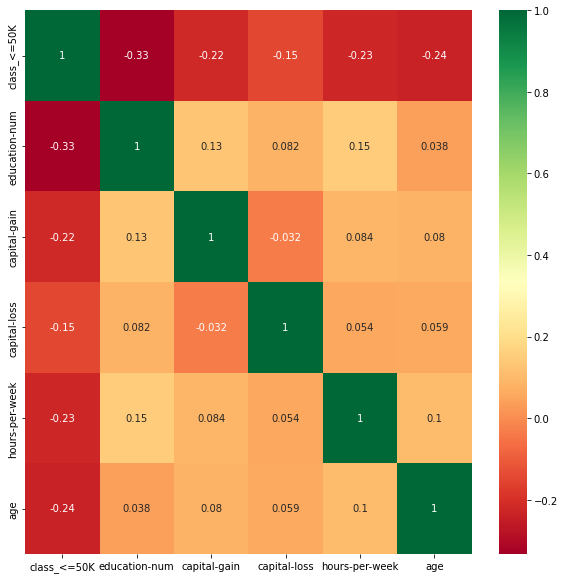

In [39]:
import seaborn as sns

# get correlation of features in the dataset
corrmat = data_reg[['class_<=50K'] + data_reg_num_col].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))

# plot heat map
g=sns.heatmap(data_reg[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

The correlation between the target variable "age" and the rest of the variables is not very high. Only the correlation to the former target "class_<=50K" is a bit higher. 

All attributes will be kept, but not as good prediction results expected as for the classification prediction.

### 2.1.2. Checking for Linearity <a class="anchor" id="linearity_check"></a>
To check if a linear regression model is fitting a scatter plot for every numerical feature with the target variable is evaluated:

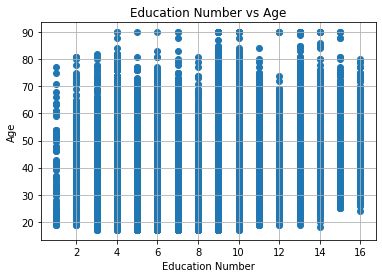

In [40]:
plt.scatter(data_reg['education-num'], data_reg['age'])
plt.title('Education Number vs Age')
plt.xlabel('Education Number')
plt.ylabel('Age')
plt.grid(True)

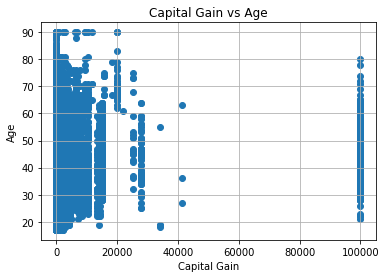

In [41]:
plt.scatter(data_reg['capital-gain'], data_reg['age'])
plt.title('Capital Gain vs Age')
plt.xlabel('Capital Gain')
plt.ylabel('Age')
plt.grid(True)

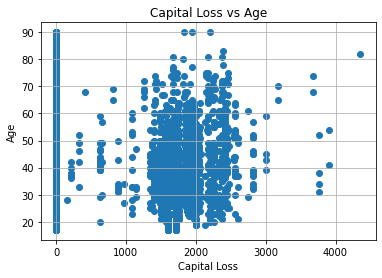

In [42]:
plt.scatter(data_reg['capital-loss'], data_reg['age'])
plt.title('Capital Loss vs Age')
plt.xlabel('Capital Loss')
plt.ylabel('Age')
plt.grid(True)

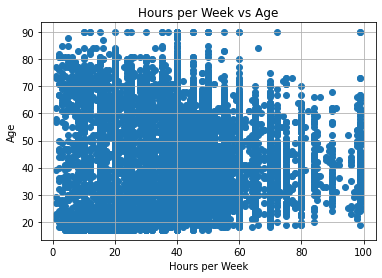

In [43]:
plt.scatter(data_reg['hours-per-week'], data_reg['age'])
plt.title('Hours per Week vs Age')
plt.xlabel('Hours per Week')
plt.ylabel('Age')
plt.grid(True)

There seems to be no or little linearity between the variables and the target variable, so for the prediction there is no good outcome expected.

### 2.1.3. Splitting in training and test data <a class="anchor" id="splitting_2"></a>
The data is split again  in a training and a test dataset.

In [44]:
from sklearn.model_selection import train_test_split

# input variables
X = data_reg.iloc[:, :-1]
# target variable
y = data_reg.iloc[:, -1]

# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### 2.1.4. Feature scaling <a class="anchor" id="Feature_scaling_2"></a>
To make the features comparable, they will be scaled again between 0 and 1.

#### Normalization <a class="anchor" id="Normalization"></a>
Since the One Hot Encoded categorical data is already either of value 0 or 1, the normalization won't touch it.

In [45]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data using the training data scaler
X_train_norm = X_train.copy()
X_train_norm[X_train_norm.columns] = norm.transform(X_train[X_train.columns])

# transform testing data using the training data scaler
X_test_norm = X_test.copy()
X_test_norm[X_test_norm.columns] = norm.transform(X_test[X_test.columns])

## 2.2. Prediction Algorithms <a class="anchor" id="Prediction_Algorithms_2"></a>

### 2.2.1. Multiple Linear Regression <a class="anchor" id="mul_lin_reg"></a>

Multiple Linear Regression is a statistical technique that uses several independent variables to predict the outcome of the target variable. The goal of multiple linear regression is to model the linear relationship between the independent variables and dependent variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one independent variable. 

We use the sklearn implementation of [ Multiple Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).

The multiple linear regression calculates the coefficients for every attribute in a linear model:

In [46]:
from sklearn.linear_model import LinearRegression

model_reg_lin = LinearRegression()

# apply model to training data
model_reg_lin.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_reg_lin.predict(X_test_norm)

# # regression coefficients
# print('Coefficients: ', model_reg_lin.coef_)
 
# variance score: 1 means perfect prediction
print('R2 score: {}'.format(model_reg_lin.score(X_test_norm, y_test)))

R2 score: 0.39722212174523297


The model is evaluated by the metric R-squared. R-squared represents the proportion of the variance for the target variable that's explained by the independent variables. So here, around 40% of the observed variation can be explained by the model's inputs. A result of R-squared = 1 would be best, so this model is not working that well.

### 2.2.2. Ridge Regression <a class="anchor" id="ridge_reg"></a>

As an extension  of linear regression, Ridge regression is available that includes an L2 penalty to the linear regression model. Here, the parameter for the penalty must be configured.  

We use the sklearn implementation of [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge).

In [47]:
from sklearn.linear_model import Ridge

model_reg_ridge = Ridge()

# apply model to training data
model_reg_ridge.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_reg_ridge.predict(X_test_norm)

# # regression coefficients
# print('Coefficients: ', model_reg_ridge.coef_)
 
# variance score: 1 means perfect prediction
print('R2 score: {}'.format(model_reg_ridge.score(X_test_norm, y_test)))

R2 score: 0.39787396492446825


The Ridge Regression provides a slightly better result. To find the best alpha to improve the model, Ridge Regression including cross validation is used:

In [48]:
from sklearn.linear_model import RidgeCV

model_reg_ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])

# apply model to training data
model_reg_ridge_cv.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_reg_ridge_cv.predict(X_test_norm)

# # regression coefficients
# print('Coefficients: ', model_reg_ridge.coef_)
 
# variance score: 1 means perfect prediction
print('R2 score: {}'.format(model_reg_ridge_cv.score(X_test_norm, y_test)))
print('Best alpha: {}'.format(model_reg_ridge_cv.alpha_))

R2 score: 0.39787396492385063
Best alpha: 1.0


Another alpha value doesn't improve the model.

### 2.2.3. K-Nearest Neighbours <a class="anchor" id="knn_reg"></a>
The K Nearest Neighbor algorithm can also be used for regression.

We use the sklearn implementation of [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor).

In [49]:
from sklearn.neighbors import KNeighborsRegressor

model_reg_knn = KNeighborsRegressor()

# apply model to training data
model_reg_knn.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_reg_knn.predict(X_test_norm)
 
# variance score: 1 means perfect prediction
print('R-squared score: {}'.format(model_reg_knn.score(X_test_norm, y_test)))

R-squared score: 0.3495874640505706


The score is worse than the score from the linear regression. With the hyperparameter K, the number of neighbors, the performance could be improved:

In [50]:
scores_knn_reg = []
k_range = list(range(1, 26))

for i in k_range:
    model_reg_knn = KNeighborsRegressor(n_neighbors=i)
    model_reg_knn.fit(X_train_norm, y_train)
    scores_knn_reg.append(model_reg_knn.score(X_test_norm, y_test))

Best K value: 18


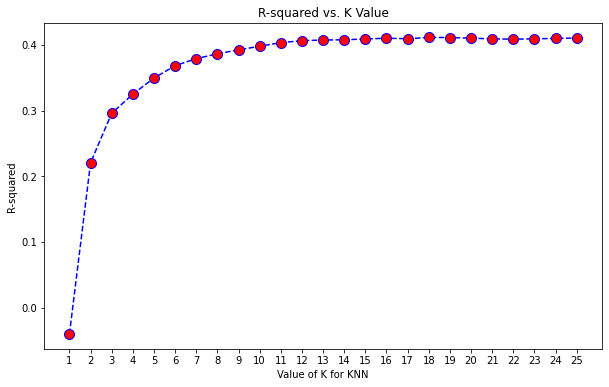

In [51]:
# plot the relationship between K and R_squared
plt.figure(figsize=(10,6))
plt.plot(k_range, scores_knn_reg, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('R-squared vs. K Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('R-squared')
plt.xticks(k_range)

best_k_value = scores_knn_reg.index(max(scores_knn_reg)) + 1
print(f'Best K value: {best_k_value}')

In [52]:
model_reg_knn = KNeighborsRegressor(n_neighbors = best_k_value)

# apply model to training data
model_reg_knn.fit(X_train_norm, y_train)

# predict target for the test data with trained model
y_pred = model_reg_knn.predict(X_test_norm)
 
# variance score: 1 means perfect prediction
print('R-squared score: {}'.format(model_reg_knn.score(X_test_norm, y_test)))

R-squared score: 0.4113350722667184


After a certain value of K the performance isn't increasing any further. To avoid overfitting the lowest best one is chosen.

### 2.2.4. Decision Tree <a class="anchor" id="Decision_Tree_2"></a>
Also, a decision tree regression is possible.

We use the sklearn implementation of [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor).

In [53]:
from sklearn.tree import DecisionTreeRegressor

model_reg_dt = DecisionTreeRegressor(random_state = 0)

# apply model to training data
model_reg_dt.fit(X_train, y_train)

# predict target for the test data with trained model
y_pred = model_reg_dt.predict(X_test)
 
# variance score: 1 means perfect prediction
print('R-squared score: {}'.format(model_reg_dt.score(X_test, y_test)))

R-squared score: 0.1602186708324047


The decision tree gets quite bad results compared to linear regression and knn.
The best value for max_depth needs to be found:

In [54]:
# get the maximum depth of the tree
max_depth = model_reg_dt.tree_.max_depth
print(f'Maximum depth of the tree: {max_depth}')

scores_tree_reg = []
d_range = list(range(1, max_depth + 1))

for i in d_range:
    model_reg_dt = DecisionTreeRegressor(random_state = 0, max_depth = i)
    model_reg_dt.fit(X_train, y_train)
    pred_i = model_reg_dt.predict(X_test)
    scores_tree_reg.append(model_reg_dt.score(X_test, y_test))

Maximum depth of the tree: 47


Best max_depth: 7


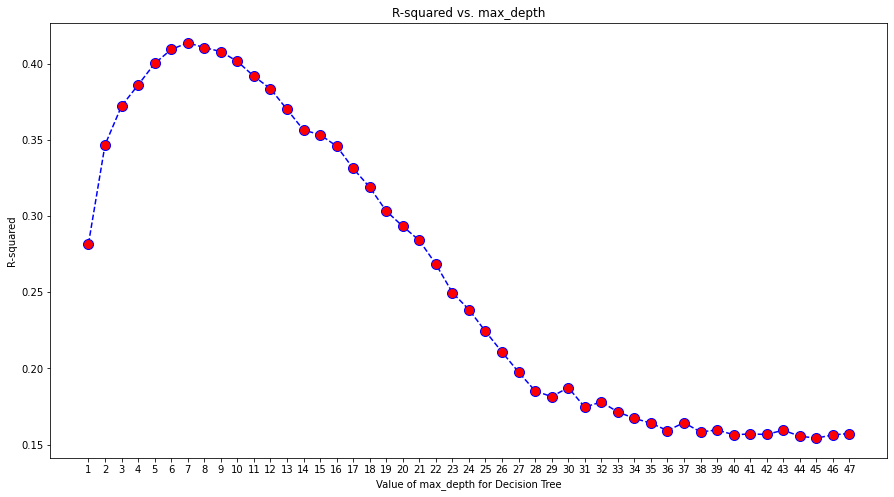

In [55]:
# plot the relationship between K and R_squared
plt.figure(figsize=(15,8))
plt.plot(d_range, scores_tree_reg, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('R-squared vs. max_depth')
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('R-squared')
plt.xticks(d_range)

best_max_depth = scores_tree_reg.index(max(scores_tree_reg)) + 1
print(f'Best max_depth: {best_max_depth}')

In [56]:
model_reg_dt = DecisionTreeRegressor(random_state = 0, max_depth = best_max_depth)

# apply model to training data
model_reg_dt.fit(X_train, y_train)

# predict target for the test data with trained model
y_pred = model_reg_dt.predict(X_test)
 
# variance score: 1 means perfect prediction
print('R-squared score: {}'.format(model_reg_dt.score(X_test, y_test)))

R-squared score: 0.4136893986644541


With the best parameter for the maximum depth found, the result is much better. 

## 2.3. Conclusion <a class="anchor" id="model_summary"></a>

Also, here we managed to increase the performance of the algorithms by tuning the parameters.  

Since the correlation between the features and the age wasn't that high, the results weren't as good as with the earning classification prediction.

Still, we could get a good impression of the different classification and regression algorithms and how to tune the parameters.